In [1]:
!pip install python-igraph
!pip install matplotlib
!pip install seaborn
from igraph import *
import matplotlib.pyplot as plt
import math
import numpy as np
import os
import seaborn as sns
plt.style.use('bmh')

/home/quinten/.anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## Download alle snapshots (uncomment degene die ge nodig hebt)
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/jan_17.txt
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/jul_19.txt
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/mar_21.txt
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/may_20.txt
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/sep_18.txt
!wget -N https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/nov_17.txt

--2021-04-20 09:17:34--  https://github.com/QuintenBruynseraede/ALSSN/raw/main/code/snapshots/jan_17.txt
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/QuintenBruynseraede/ALSSN/main/code/snapshots/jan_17.txt [following]
--2021-04-20 09:17:34--  https://raw.githubusercontent.com/QuintenBruynseraede/ALSSN/main/code/snapshots/jan_17.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19739850 (19M) [text/plain]
Saving to: ‘jan_17.txt’

jan_17.txt          100%[===================>]  18,83M  26,5MB/s    in 0,7s    

Last-modified header missing -- time-stamps turned off.
2021-04-20 09:17:36 (26,5 

In [3]:
!ls snapshots

balances.txt  jul_19.txt  may_20.txt  sep_18.txt
jan_17.txt    mar_21.txt  nov_17.txt


## Degree distribution plot

In [6]:
# jan_17.txt nov_17.txt sep_18.txt jul_19.txt may_20.txt mar_21.txt  
file = "nov_17.txt"
g = Graph.Read_Ncol("snapshots/"+file, directed=True)

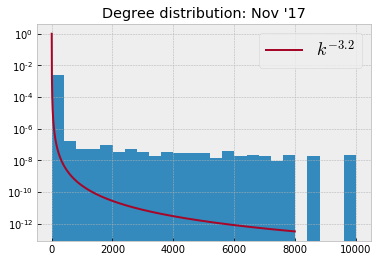

In [8]:
degree = g.degree()

# Create log histogram
x,bins,p = plt.hist(degree, bins=25,density=True)
plt.yscale("log")
plt.title("Degree distribution: Nov '17")

# Add power law curve and create legend
exp = -3.2
plt.plot(range(1,8000),[t**(exp) for t in range(1,8000)],label=r'$k^{'+str(exp)+'}$')
plt.legend(prop={'size': 18})

plt.savefig("plots/degree_dist_{}.pdf".format(file[:-4]),bbox_inches="tight")

## Indegree/outdegree

In [20]:
# jan_17.txt nov_17.txt sep_18.txt jul_19.txt may_20.txt mar_21.txt  
for file in os.listdir("snapshots"):
    if not file.endswith(".txt"):
        continue
    print(file)
    g = Graph.Read_Ncol("snapshots/"+file, directed=True)

    in_degree = g.indegree()
    out_degree = g.outdegree()

    # Create log histogram
    print(sum(in_degree))
    print(sum(out_degree))

# Add power law curve and create legend
# exp = -3.2
# plt.plot(range(1,8000),[t**(exp) for t in range(1,8000)],label=r'$k^{'+str(exp)+'}$')
# plt.legend(prop={'size': 18})

# plt.savefig("plots/degree_dist_{}.pdf".format(file[:-4]),bbox_inches="tight")

mar_21.txt
701482
701482
may_20.txt
580773
580773
jan_17.txt
186942
186942
jul_19.txt
673967
673967
balances.txt
0
0
sep_18.txt
635623
635623
nov_17.txt
657697
657697


## Transaction volume

jan_17.txt
nov_17.txt
sep_18.txt
jul_19.txt
may_20.txt
mar_21.txt


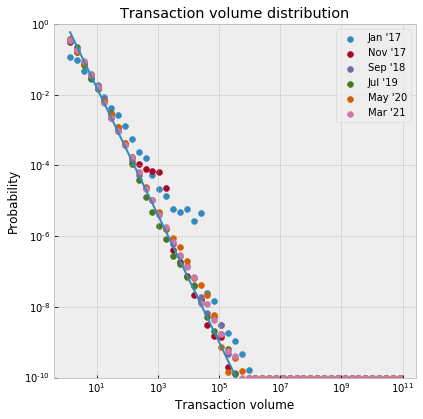

In [27]:
for i in range(6):
    file = ["jan_17.txt","nov_17.txt","sep_18.txt","jul_19.txt","may_20.txt","mar_21.txt"][i]
    label = ["Jan '17", "Nov '17", "Sep '18", "Jul '19", "May '20", "Mar '21"][i]
    if not file.endswith(".txt") or "balance" in file:
        continue

    print(file)
    # Create graph
    g = Graph.Read_Ncol("snapshots/"+file, directed=True)

    # Collect volumes in list
    vol = []
    for v in g.vs():
        vol.append(sum([g.es[e]["weight"] for e in g.incident(v,mode="out")]))
    vol = list(map(lambda x: x/1e18,vol))

    # Calculate distribution in logarithmically scaled bins
    ls = np.logspace(0,11,num=50)
    y,bins = np.histogram(vol,ls,density=True)
    x = [(ls[i]+ls[i+1])/2 for i in range(len(ls)-1)]
    
    # Give zeroes a very small positive value
    for i in range(len(y)):
        if y[i] == 0:
            y[i] = 1e-10

    # Scatter
    plt.scatter(x,y,label=label)

# Setup loglog plot with labels and titles
plt.plot(x,[k**(-1.80) for k in x])
plt.ylim(1e-10,1e0)
plt.yscale("log")
plt.legend()
plt.xscale('log')
plt.title("Transaction volume distribution")
plt.xlabel("Transaction volume")
plt.ylabel("Probability")
fig = plt.gcf()
fig.set_size_inches(6.5, 6.5)
plt.savefig("plots/transaction_volume.pdf",bbox_inches="tight")

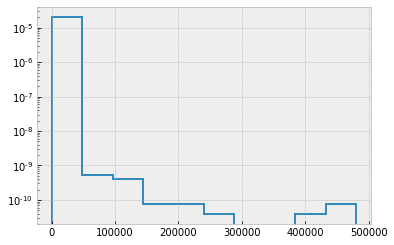

In [56]:
plt.hist(vol,density=True,histtype="step",linewidth=2)
plt.yscale("log")

In [9]:
## Code for other metrics

In [3]:
# Calculate some properties:
degree = g.degree()
betw = g.betweenness()
apl = g.average_path_length()
cls = g.closeness
pgrnk = g.pagerank()
clcof = g.transitivity_undirected()


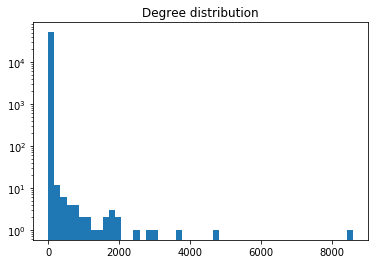

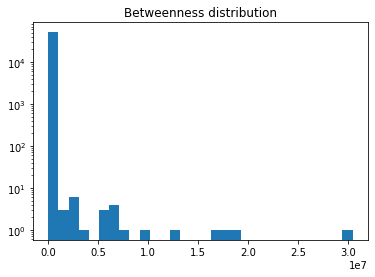

APL: 5.214216547223317


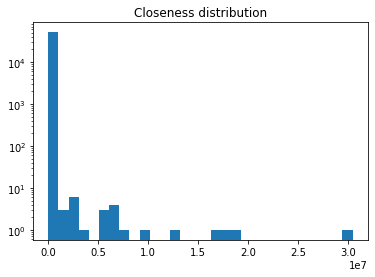

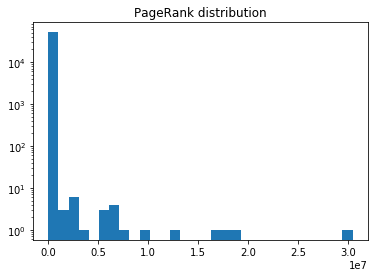

Transitivity_undirected: 2.3576329557488363e-06


In [4]:
# All functions: https://igraph.org/python/doc/api/igraph.Graph.html
plt.hist(degree, bins=50)
plt.yscale("log")
plt.title("Degree distribution")
plt.show()

plt.hist(betw, bins=30)
plt.yscale("log")
plt.title("Betweenness distribution")
plt.show()

print("APL: {}".format(apl))

# Simple Histogram of closeness distribution
plt.hist(betw, bins=30)
plt.yscale("log")
plt.title("Closeness distribution")
plt.show()

# Simple Histogram of PageRank distribution
plt.hist(betw, bins=30)
plt.yscale("log")
plt.title("PageRank distribution")
plt.show()

print("Transitivity_undirected: {}".format(clcof))

In [8]:
# layout = g.layout(layout='auto')
visual_style = {}
visual_style["vertex_size"] = 0.2
max_weight = math.log(max(g.es["weight"]))
# Scale edge_widths logarithmically to suppress large ranges
visual_style["edge_width"] = [0.1+(1.0*math.log(weight)/max_weight) for weight in g.es["weight"]]
visual_style["layout"] = layout
visual_style["bbox"] = (1000, 1000)
visual_style["margin"] = 20
plot(g, target='plots/plot.pdf')
print("Wrote graph plot to plot.pdf")

Wrote graph plot to plot.pdf
